In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# lets load the dataset

In [2]:
df_house=pd.read_csv('1553768847-housing.csv')

In [3]:
df_house.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200

In [4]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
##sumirizing the stats of the data
df_house.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [6]:
#check the missing the values
df_house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [7]:
len(df_house['total_bedrooms'])

20640

In [8]:
#since the missing values of the dataset is total_bedrooms
print('total percentage of missing values are {}'.format(df_house['total_bedrooms'].isnull().sum()/len(df_house['total_bedrooms'])))

total percentage of missing values are 0.01002906976744186


In [9]:
df_house['total_bedrooms'].mean()

537.8705525375618

In [10]:
df_house['total_bedrooms'].fillna(df_house['total_bedrooms'].mean(),inplace=True)

In [11]:
df_house.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [12]:
#exploratory data anlysis
#correlation
corr_mat=df_house.corr()

In [13]:
corr_mat

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069260 -0.066658           -0.318998     0.927253   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069260    0.099773    0.055310      -0.015176   
latitude                 -0.066658   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.318998   -0.296244   -0.302916      -0.119034   
total_rooms               0.927253    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.873910    0.974725      -0.007682   
population                0.873910    1.000000    0.907222       0.004834   
households                0.974725    0.907222    1.000000       0.013033   
median_income            -0.007682    0.004834    0.013033       1.000000   
median_house_value        0.049454   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049454  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

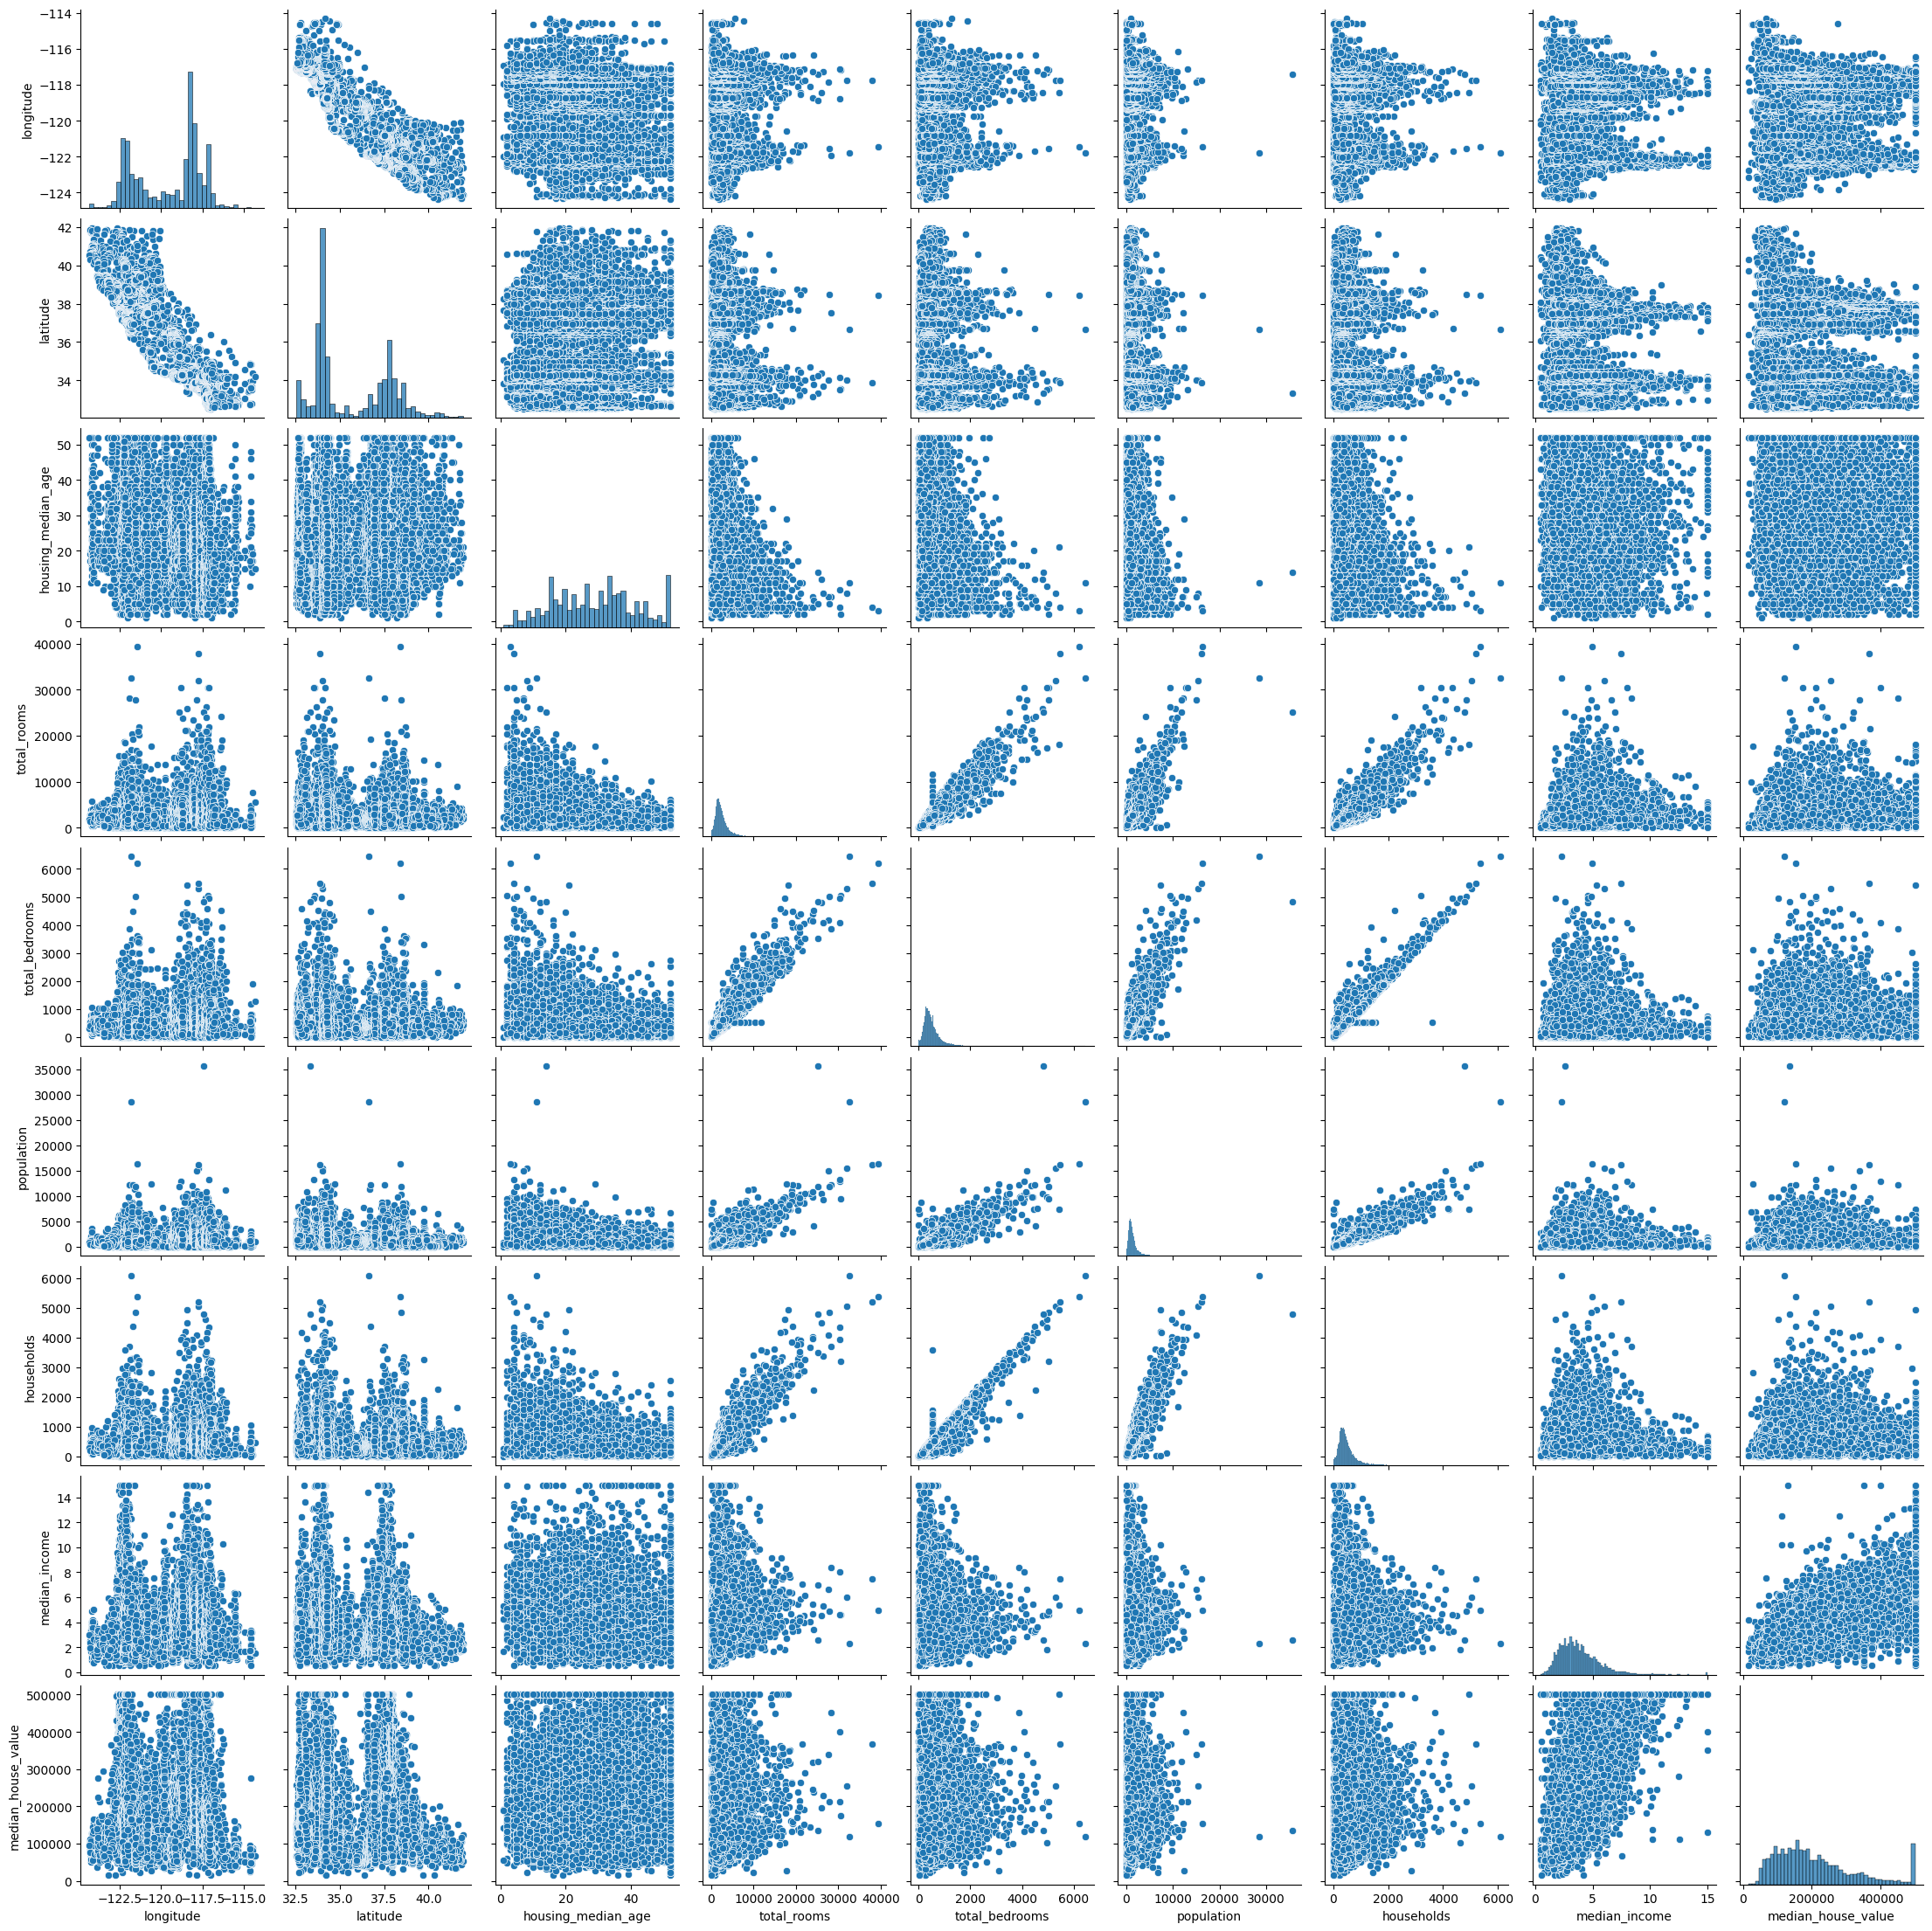

In [14]:
import seaborn as sns
sns.pairplot(df_house)

In [15]:
numerical_col=[col for col in df_house.columns if df_house[col].dtype!='O']

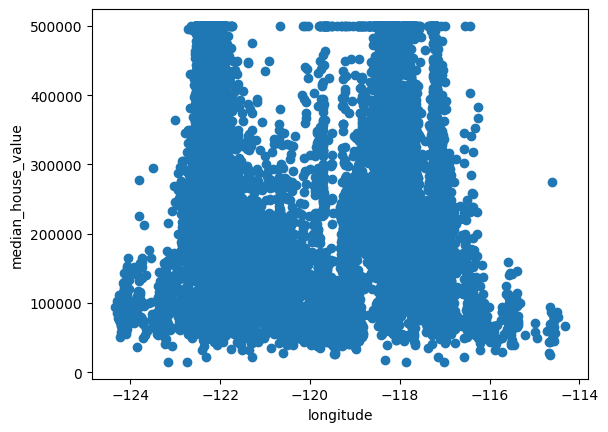

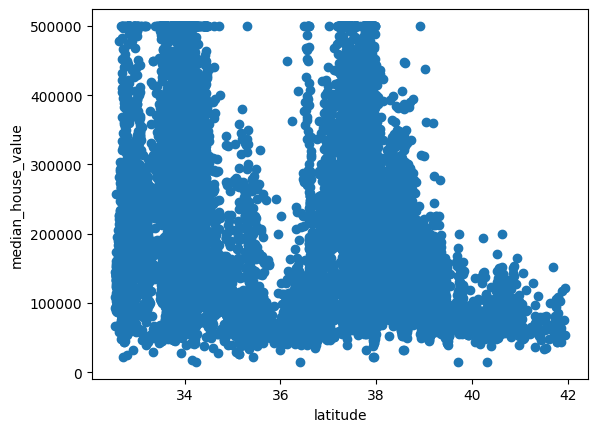

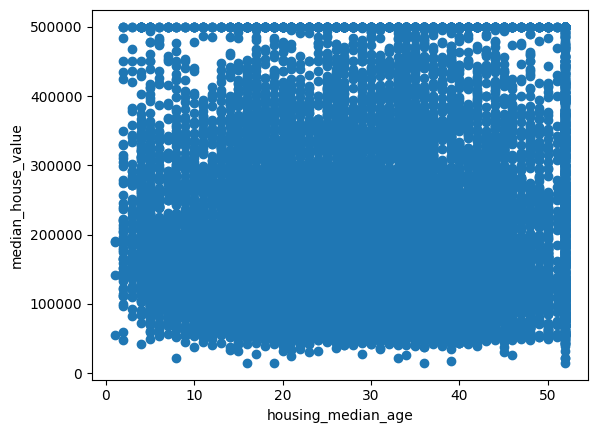

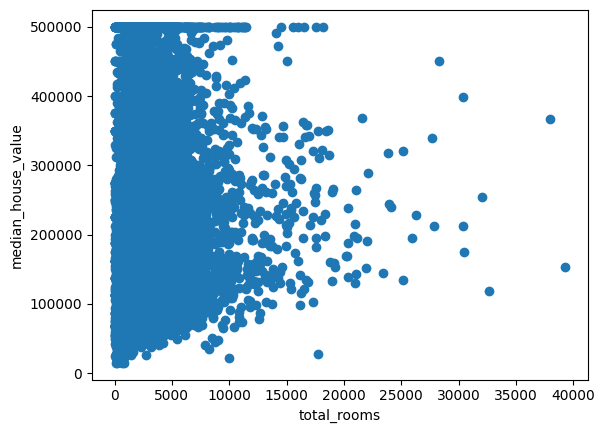

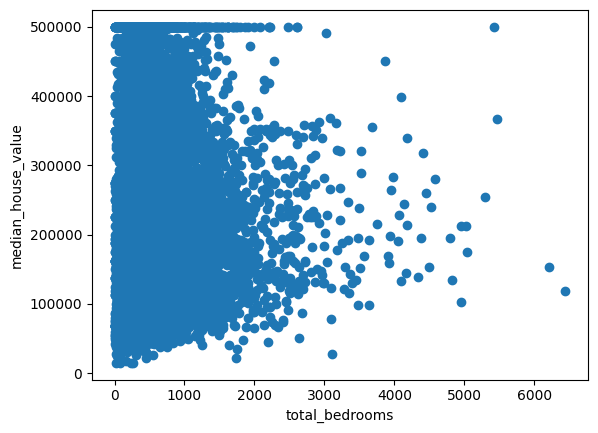

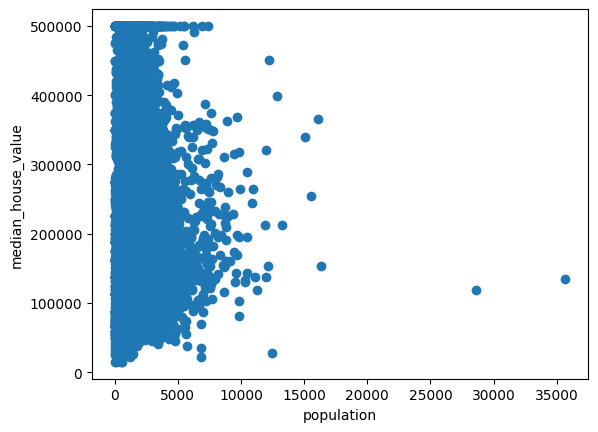

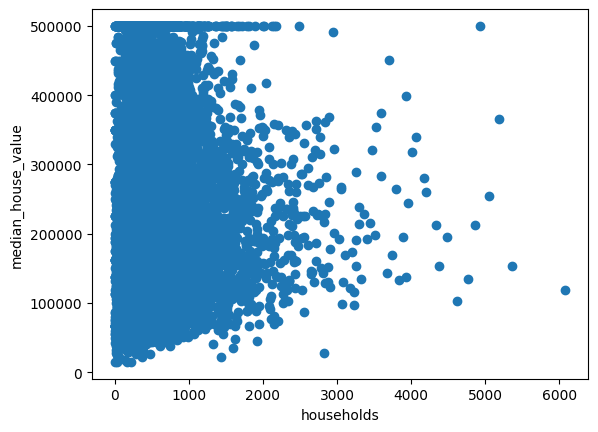

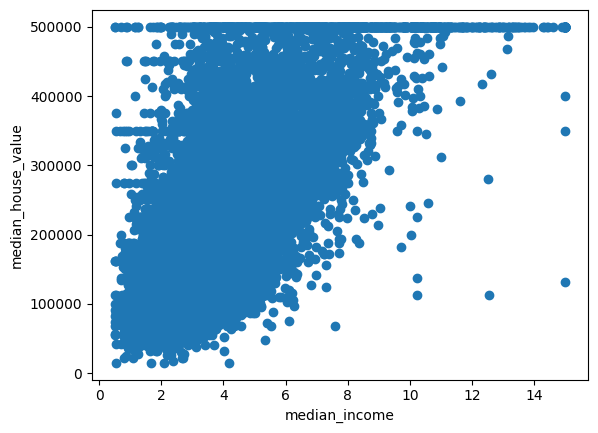

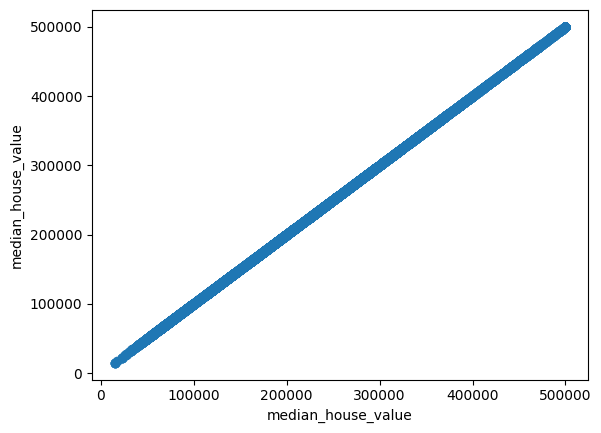

In [16]:
for col in numerical_col:
    plt.scatter(df_house[col],df_house['median_house_value'])
    plt.xlabel(col)
    plt.ylabel('median_house_value')
    plt.show()

C:\Users\HOME\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


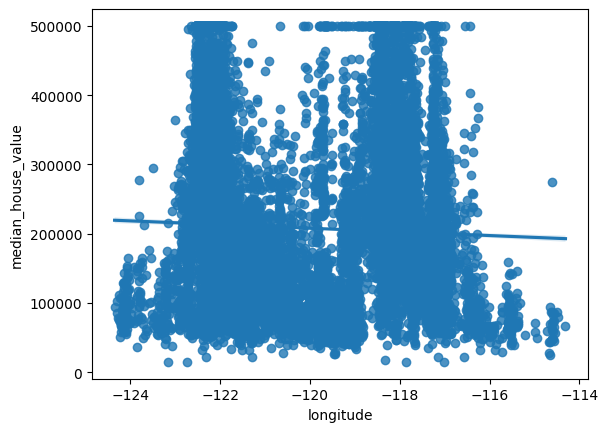

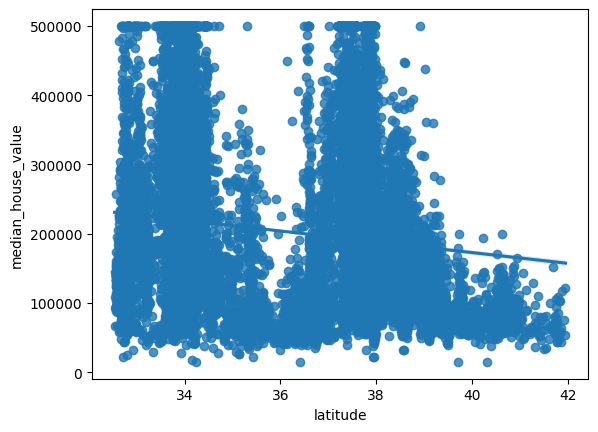

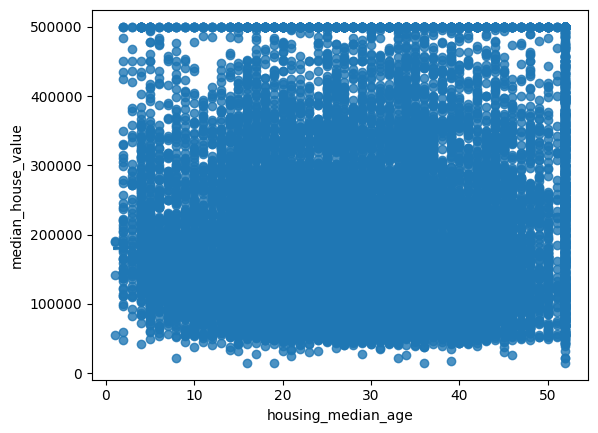

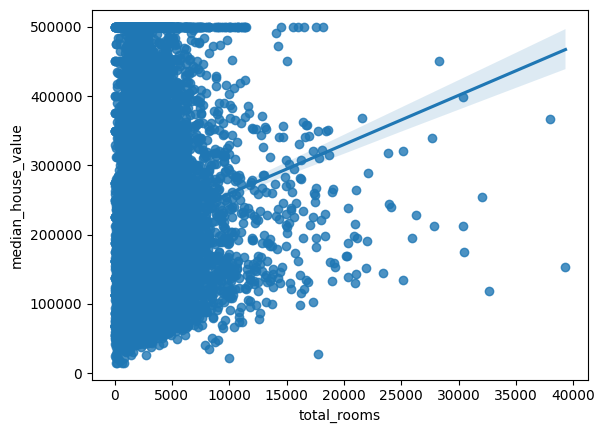

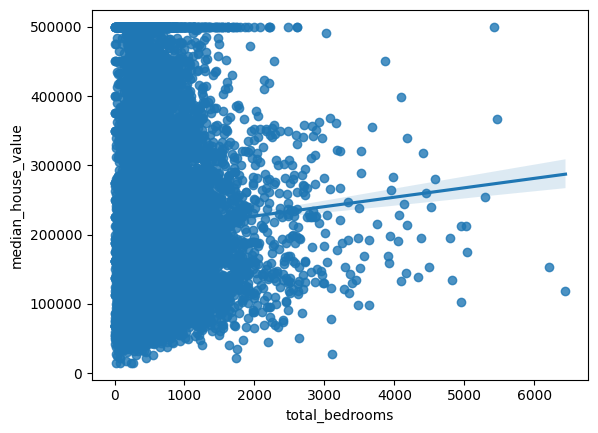

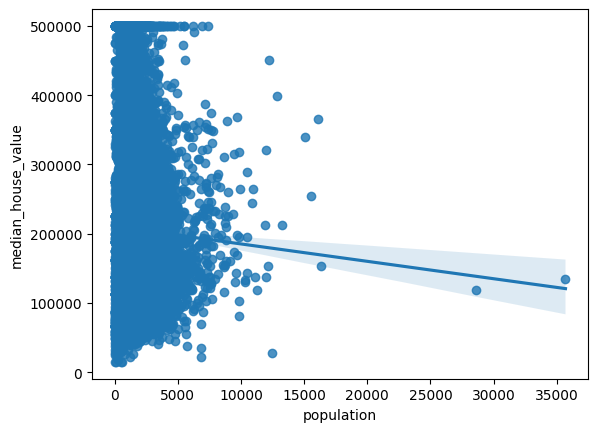

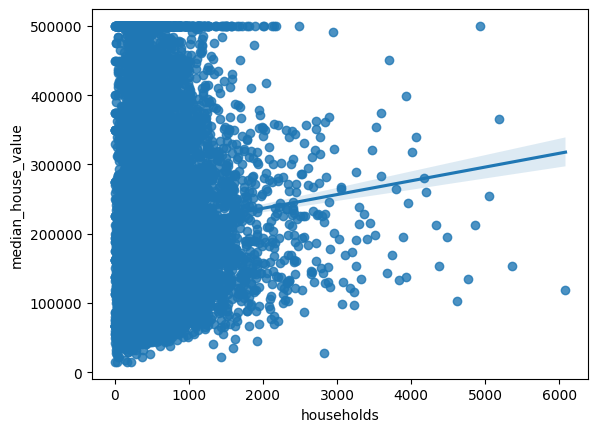

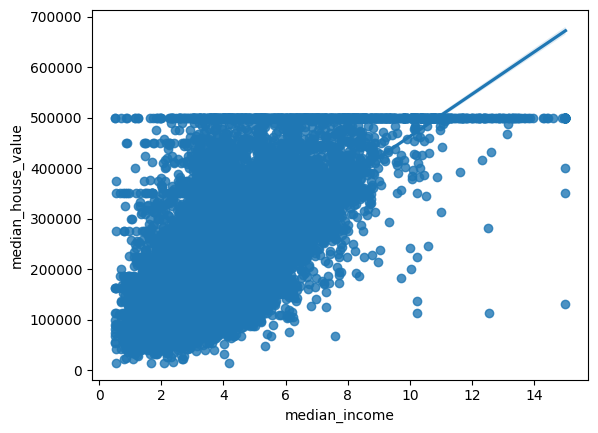

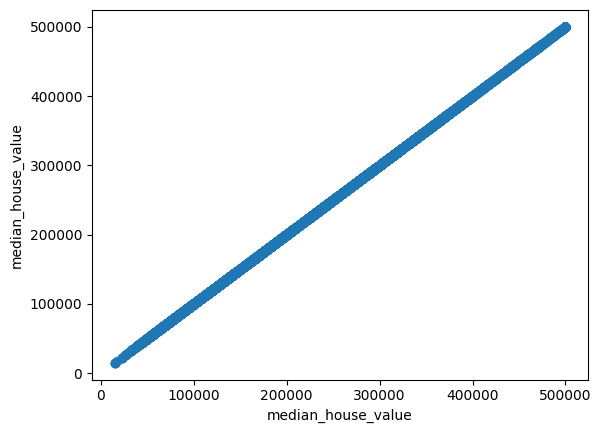

In [17]:
#regression plot
for col in numerical_col:
    sns.regplot(df_house[col],df_house['median_house_value'])
    plt.xlabel(col)
    plt.ylabel('median_house_value')
    plt.show()

# check the outliers for numerical_cols

C:\Users\HOME\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


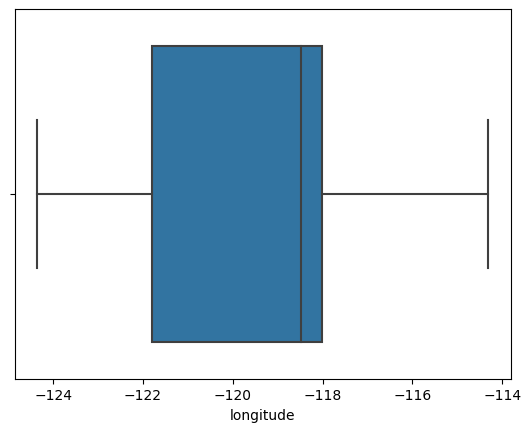

C:\Users\HOME\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


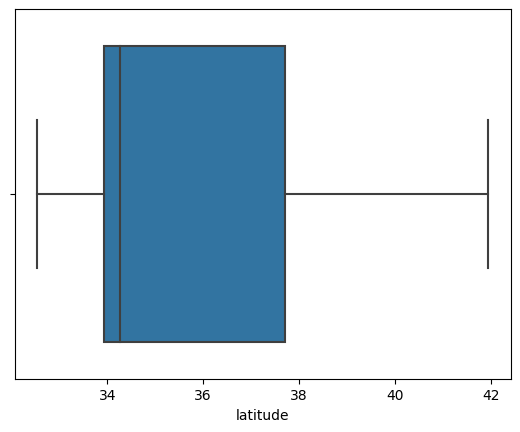

C:\Users\HOME\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


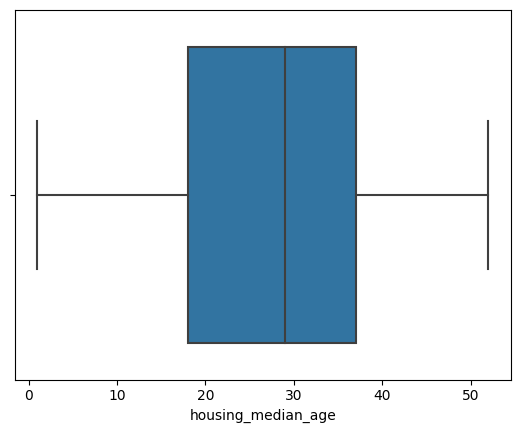

C:\Users\HOME\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


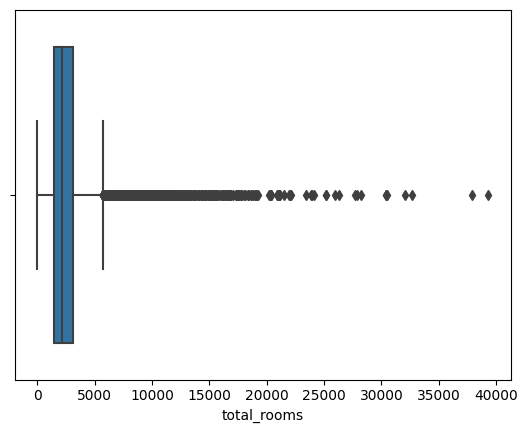

C:\Users\HOME\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


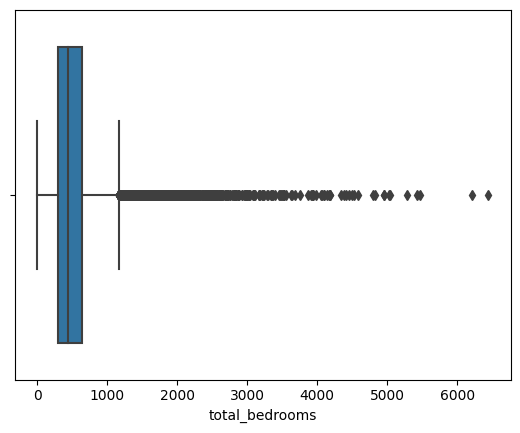

C:\Users\HOME\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


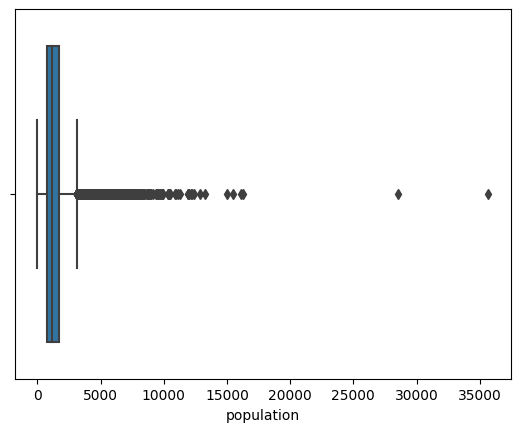

C:\Users\HOME\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


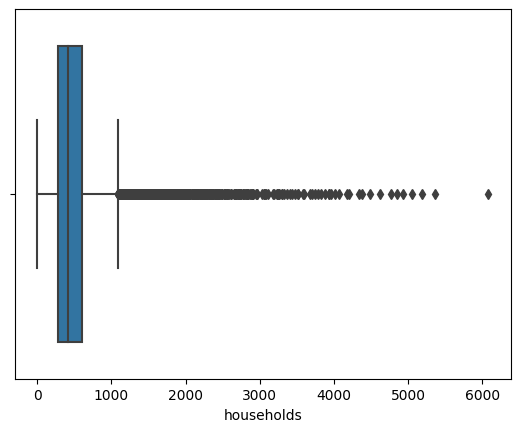

C:\Users\HOME\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


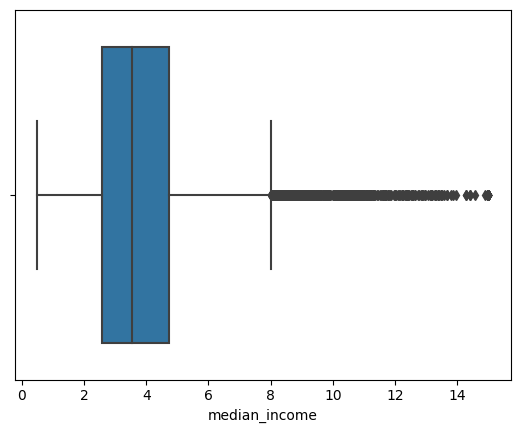

C:\Users\HOME\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


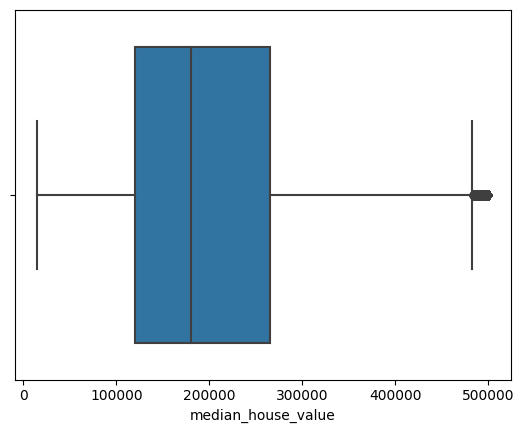

In [18]:
for col in numerical_col:
    sns.boxplot(df_house[col])
    plt.xlabel(col)
    plt.show()

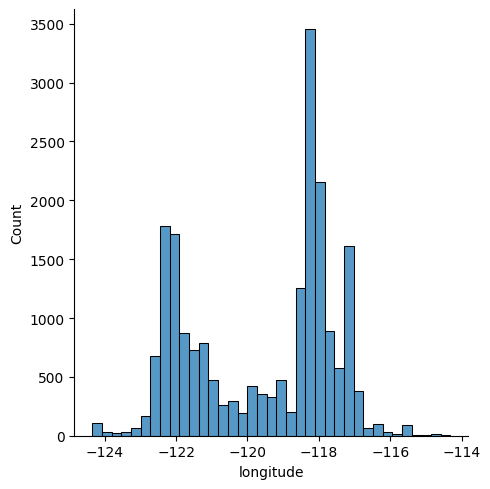

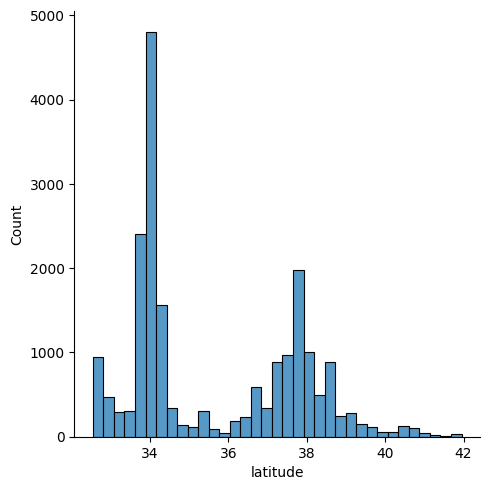

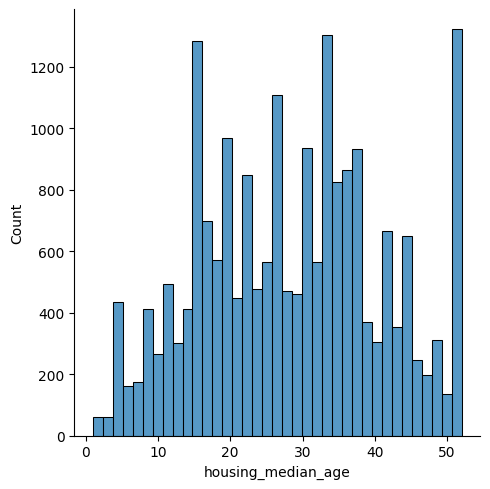

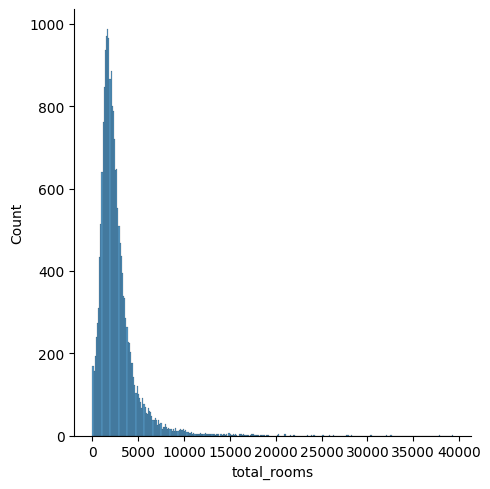

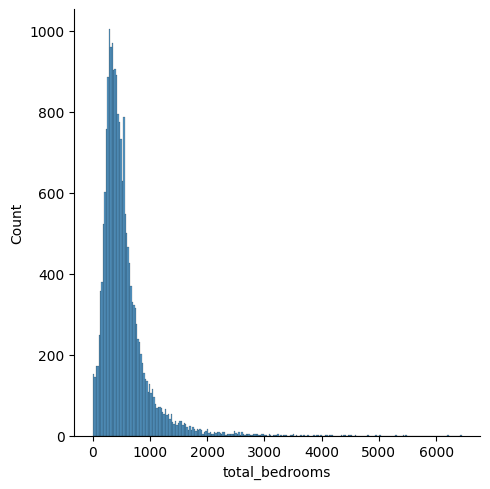

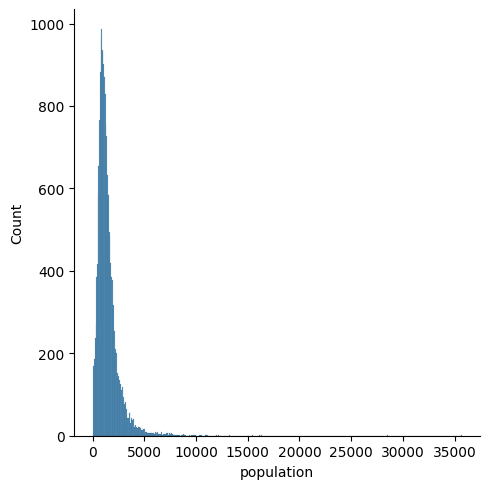

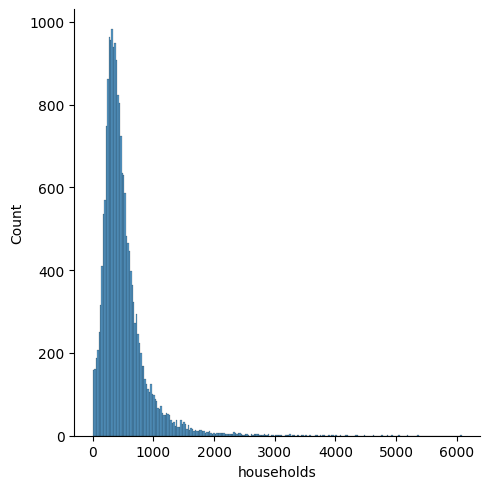

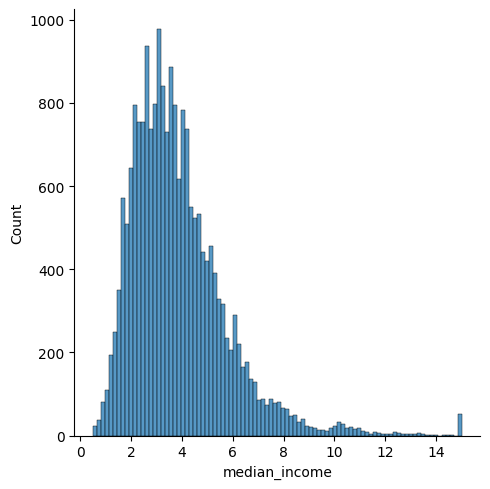

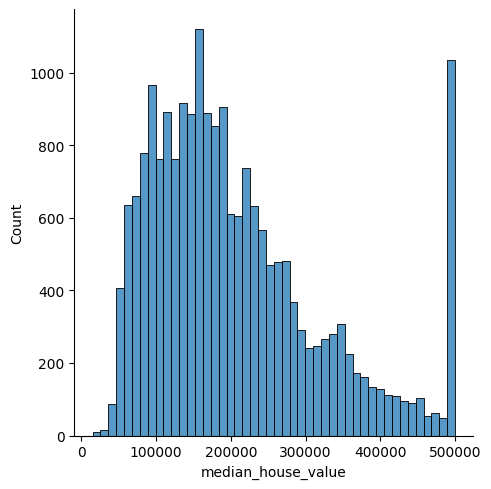

In [19]:
for col in numerical_col:
    sns.displot(df_house[col])
    plt.xlabel(col)
    plt.show()

# catergorical_cols

In [20]:
categorical_cols=[col for col in df_house.columns if df_house[col].dtype=='O']


In [21]:
categorical_cols

['ocean_proximity']

C:\Users\HOME\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='ocean_proximity', ylabel='count'>

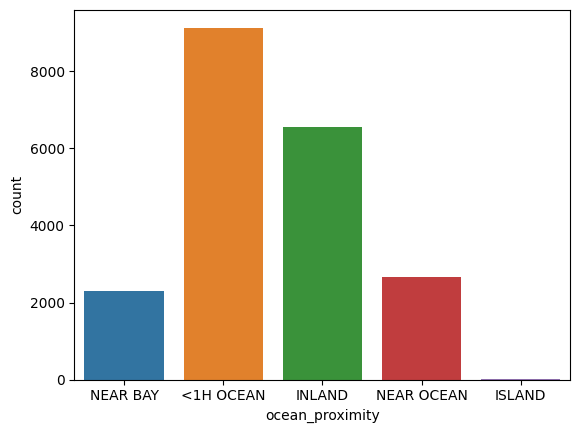

In [22]:
#lets plot categorical_cols for price of house
sns.countplot(df_house['ocean_proximity'])

In [23]:
#creating the dummy varibles for categorical varibles

In [24]:
df_house=pd.get_dummies(df_house,drop_first=True)

In [25]:
df_house.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value  \
0         322         126         8.3252              452600   
1        2401        1138         8.3014              358500   
2         496         177         7.2574              352100   
3         558         219         5.6431              341300   
4         565         259         3.8462              342200   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                       0                       0                         1   
1                       0                       0                         1   
2                       0                       0                         1   
3                       0                       0                         1   
4                       0                       0                         1   

   ocean_proximity_NEAR OCEAN  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0

In [26]:
df_house[numerical_col]=np.log(df_house[numerical_col])

C:\Users\HOME\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


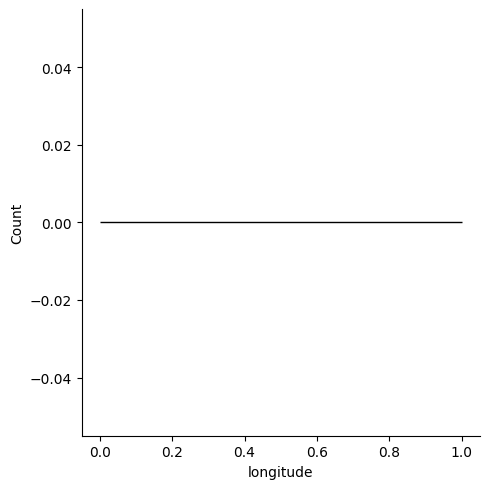

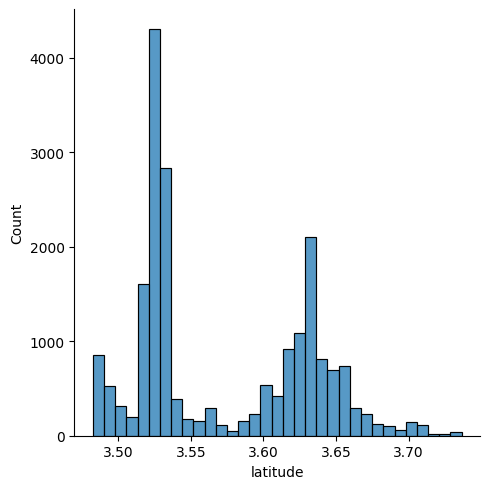

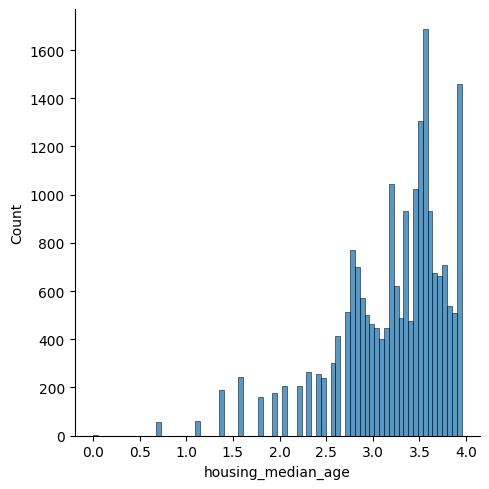

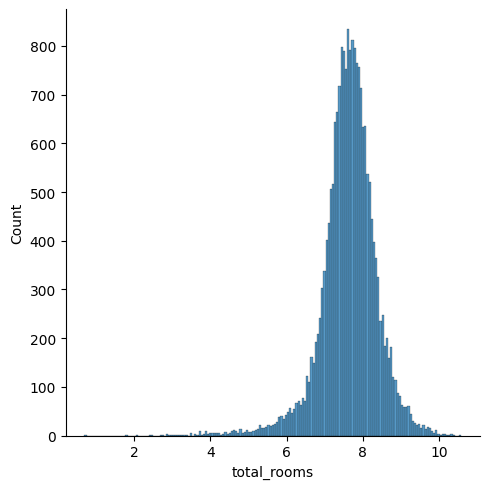

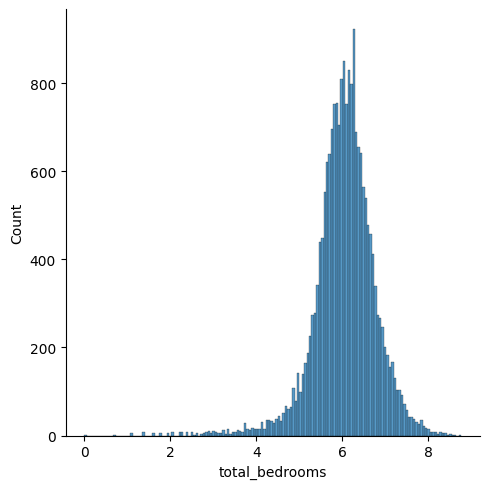

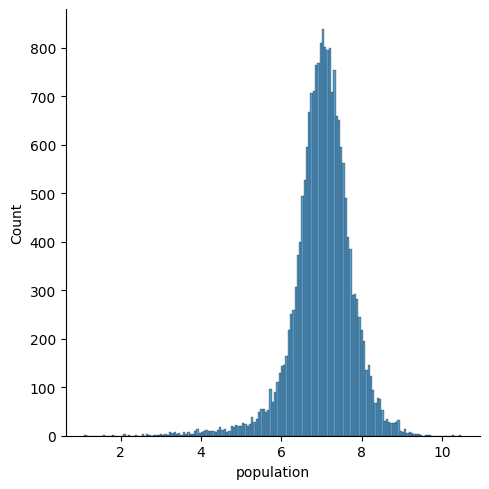

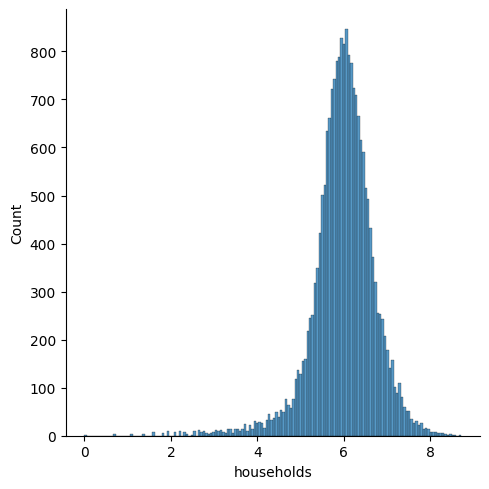

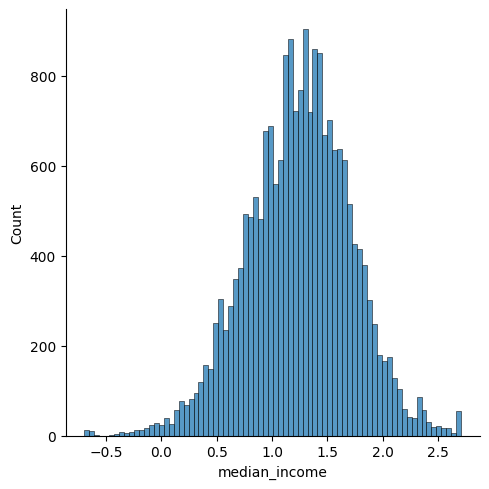

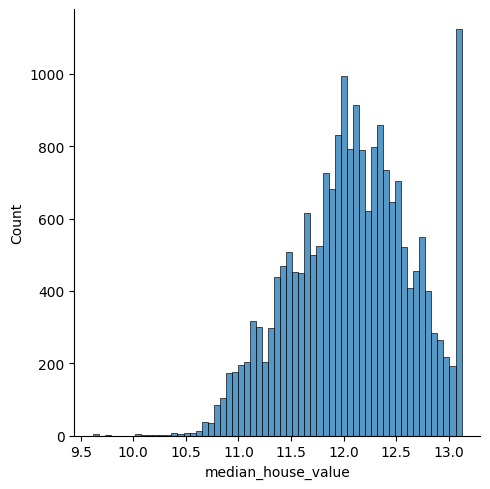

In [27]:
for col in df_house[numerical_col]:
    sns.displot(df_house[col])
    plt.xlabel(col)
    plt.show()

In [28]:
#since there is multicolinarielaty between the households and total_bedrooms
# we drop households
df_house.drop('households',axis=1,inplace=True)

In [29]:
#divinding the independent feature and dependent feature
df_house.head()


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        NaN  3.634423            3.713572     6.779922        4.859812   
1        NaN  3.633895            3.044522     8.867709        7.008505   
2        NaN  3.633631            3.951244     7.290975        5.247024   
3        NaN  3.633631            3.951244     7.149917        5.459586   
4        NaN  3.633631            3.951244     7.394493        5.634790   

   population  median_income  median_house_value  ocean_proximity_INLAND  \
0    5.774552       2.119287           13.022764                       0   
1    7.783641       2.116424           12.789684                       0   
2    6.206576       1.982022           12.771671                       0   
3    6.324359       1.730434           12.740517                       0   
4    6.336826       1.347086           12.743151                       0   

   ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                       0                         1   
1                       0                         1   
2                       0                         1   
3                       0                         1   
4                       0                         1   

   ocean_proximity_NEAR OCEAN  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0

In [30]:
#splitting the dataset into independent varible and dependent variable
x=df_house.drop(['median_house_value','longitude'],axis=1)
y=df_house['median_house_value']

In [31]:
x

latitude  housing_median_age  total_rooms  total_bedrooms  population  \
0      3.634423            3.713572     6.779922        4.859812    5.774552   
1      3.633895            3.044522     8.867709        7.008505    7.783641   
2      3.633631            3.951244     7.290975        5.247024    6.206576   
3      3.633631            3.951244     7.149917        5.459586    6.324359   
4      3.633631            3.951244     7.394493        5.634790    6.336826   
...         ...                 ...          ...             ...         ...   
20635  3.675794            3.218876     7.417580        5.924256    6.739337   
20636  3.676047            2.890372     6.546785        5.010635    5.874931   
20637  3.674527            2.833213     7.720462        6.184149    6.914731   
20638  3.674527            2.890372     7.528332        6.013715    6.608001   
20639  3.673004            2.772589     7.932003        6.423247    7.234898   

       median_income  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0           2.119287                       0                       0   
1           2.116424                       0                       0   
2           1.982022                       0                       0   
3           1.730434                       0                       0   
4           1.347086                       0                       0   
...              ...                     ...                     ...   
20635       0.444878                       1                       0   
20636       0.938756                       1                       0   
20637       0.530628                       1                       0   
20638       0.624440                       1                       0   
20639       0.870707                       1                       0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                             1                           0  
1                             1                           0  
2                             1                           0  
3                             1                           0  
4                             1                           0  
...                         ...                         ...  
20635                         0                           0  
20636                         0                           0  
20637                         0                           0  
20638                         0                           0  
20639                         0                           0  

[20640 rows x 10 columns]

In [32]:
y

0        13.022764
1        12.789684
2        12.771671
3        12.740517
4        12.743151
           ...    
20635    11.265745
20636    11.252859
20637    11.432799
20638    11.346871
20639    11.400876
Name: median_house_value, Length: 20640, dtype: float64

In [33]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [34]:
x_train

latitude  housing_median_age  total_rooms  total_bedrooms  population  \
7061   3.524300            3.555348     7.783224        5.986452    7.104965   
14689  3.490124            2.995732     7.688455        6.280396    6.906755   
17323  3.543565            3.178054     7.378384        5.641907    6.594413   
10056  3.670206            2.639057     6.697034        5.017280    5.710427   
15750  3.631515            3.951244     8.067149        6.562444    7.330405   
...         ...                 ...          ...             ...         ...   
11284  3.519869            3.555348     7.192934        5.303305    6.489205   
11964  3.526949            3.496508     8.033983        6.345636    7.469084   
5390   3.527242            3.583519     7.650169        6.343880    7.470794   
860    3.626472            2.708050     8.181720        6.391917    7.482682   
15795  3.631515            3.951244     8.349011        7.181592    7.870548   

       median_income  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
7061        1.418568                       0                       0   
14689       1.051905                       0                       0   
17323       1.435703                       0                       0   
10056       1.134430                       1                       0   
15750       1.195981                       0                       0   
...              ...                     ...                     ...   
11284       1.851599                       0                       0   
11964       1.115142                       1                       0   
5390        1.076503                       0                       0   
860         1.743829                       0                       0   
15795       0.946044                       0                       0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
7061                          0                           0  
14689                         0                           1  
17323                         0                           1  
10056                         0                           0  
15750                         1                           0  
...                         ...                         ...  
11284                         0                           0  
11964                         0                           0  
5390                          0                           0  
860                           0                           0  
15795                         1                           0  

[14448 rows x 10 columns]

In [35]:
x_test

latitude  housing_median_age  total_rooms  total_bedrooms  population  \
20046  3.585184            3.218876     7.316548        6.287618    7.238497   
3024   3.559340            3.401197     7.987185        6.287618    7.355641   
15663  3.632309            3.951244     8.250620        6.287618    7.177782   
20484  3.534562            2.833213     8.023225        6.287618    7.441320   
9814   3.600595            3.526361     7.762596        6.287618    6.968850   
...         ...                 ...          ...             ...         ...   
17505  3.620601            3.850148     6.914731        5.501258    6.364751   
13512  3.529591            3.713572     7.113956        5.710427    6.901737   
10842  3.516607            2.772589     8.982310        7.730175    8.519989   
16559  3.632838            2.302585     9.127502        7.480992    8.688622   
5786   3.530763            2.833213     8.572060        7.380879    8.322637   

       median_income  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
20046       0.519508                       1                       0   
3024        0.928733                       1                       0   
15663       1.247061                       0                       0   
20484       1.747041                       0                       0   
9814        1.315067                       0                       0   
...              ...                     ...                     ...   
17505       1.083329                       0                       0   
13512       0.398172                       1                       0   
10842       1.256186                       0                       0   
16559       1.294727                       1                       0   
5786        1.115797                       0                       0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
20046                         0                           0  
3024                          0                           0  
15663                         1                           0  
20484                         0                           0  
9814                          0                           1  
...                         ...                         ...  
17505                         0                           0  
13512                         0                           0  
10842                         0                           0  
16559                         0                           0  
5786                          0                           0  

[6192 rows x 10 columns]

In [36]:
#standarize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [37]:
x_train

array([[-0.80550456,  0.58548662,  0.19975924, ..., -0.01664126,
        -0.35549129, -0.37688739],
       [-1.38261316, -0.39729903,  0.0739235 , ..., -0.01664126,
        -0.35549129,  2.65331242],
       [-0.48018777, -0.07710969, -0.33779587, ..., -0.01664126,
        -0.35549129,  2.65331242],
       ...,
       [-0.75580948,  0.63495974,  0.02308571, ..., -0.01664126,
        -0.35549129, -0.37688739],
       [ 0.91981731, -0.90252033,  0.72889084, ..., -0.01664126,
        -0.35549129, -0.37688739],
       [ 1.00497772,  1.28075038,  0.95102285, ..., -0.01664126,
         2.81300847, -0.37688739]])

In [38]:
x_test

array([[ 0.22261638, -0.00541895, -0.41990234, ..., -0.01664126,
        -0.35549129, -0.37688739],
       [-0.21379742,  0.31477039,  0.47058241, ..., -0.01664126,
        -0.35549129, -0.37688739],
       [ 1.01838493,  1.28075038,  0.82037715, ..., -0.01664126,
         2.81300847, -0.37688739],
       ...,
       [-0.93540041, -0.78917912,  1.79192962, ..., -0.01664126,
        -0.35549129, -0.37688739],
       [ 1.02731716, -1.61458976,  1.98471874, ..., -0.01664126,
        -0.35549129, -0.37688739],
       [-0.69636779, -0.68271141,  1.24719167, ..., -0.01664126,
        -0.35549129, -0.37688739]])

# model training

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
regression=LinearRegression()

In [41]:
regression.fit(x_train,y_train)

LinearRegression()

In [42]:
#print the coefficents and intercept
print(regression.coef_)


[-0.00871201  0.03706317 -0.1997228   0.42048474 -0.21222124  0.38634277
 -0.21207467  0.00857191  0.00680614  0.00480057]


In [43]:
print(regression.intercept_)

12.08486572019341


In [44]:
#on which parameter the model has been trained
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [45]:
#prediction the of test data

In [46]:
reg_pred=regression.predict(x_test)

In [47]:
reg_pred

array([11.32974015, 11.46927309, 12.21289733, ..., 12.38593931,
       11.68524975, 12.23814031])

# ASSUMPTION

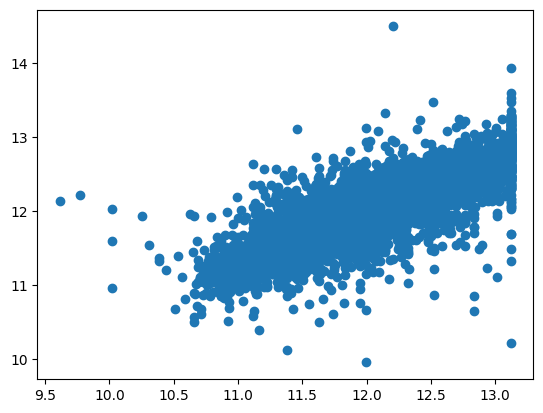

In [48]:
#plot the scattere for prediction
plt.scatter(y_test,reg_pred)

In [49]:
#calculating the residuals
residuals=y_test-reg_pred

In [50]:
print(residuals)

20046   -0.557053
3024    -0.737234
15663    0.909468
20484   -0.232287
9814     0.107327
           ...   
17505    0.188306
13512    0.026426
10842   -0.091856
16559    0.004985
5786     0.015770
Name: median_house_value, Length: 6192, dtype: float64


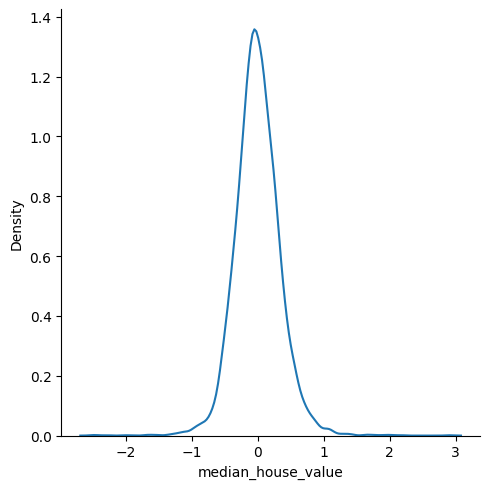

In [51]:
#ploting the residuals
sns.displot(residuals,kind='kde')

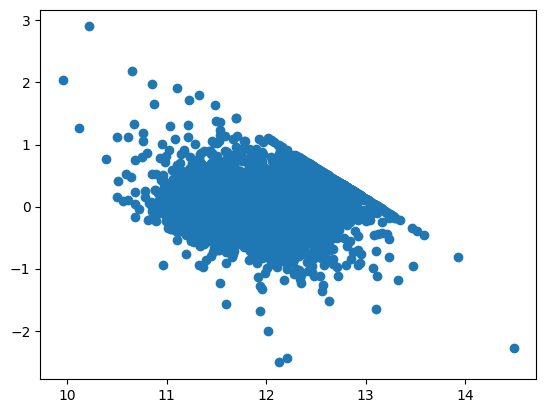

In [52]:
#scatter plot with residuals  and prediction
#uniform distrubution
plt.scatter(reg_pred,residuals)

# validation model

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [54]:
print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

0.2537419916050863
0.11615022648265273
0.3408081960320977


# R SQUARE and Adjusted R SQUARE

In [55]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.6414551794155915


In [56]:
#displaying the adjusted r2
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6408751036663851

# new_data prediction

In [57]:
x

latitude  housing_median_age  total_rooms  total_bedrooms  population  \
0      3.634423            3.713572     6.779922        4.859812    5.774552   
1      3.633895            3.044522     8.867709        7.008505    7.783641   
2      3.633631            3.951244     7.290975        5.247024    6.206576   
3      3.633631            3.951244     7.149917        5.459586    6.324359   
4      3.633631            3.951244     7.394493        5.634790    6.336826   
...         ...                 ...          ...             ...         ...   
20635  3.675794            3.218876     7.417580        5.924256    6.739337   
20636  3.676047            2.890372     6.546785        5.010635    5.874931   
20637  3.674527            2.833213     7.720462        6.184149    6.914731   
20638  3.674527            2.890372     7.528332        6.013715    6.608001   
20639  3.673004            2.772589     7.932003        6.423247    7.234898   

       median_income  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0           2.119287                       0                       0   
1           2.116424                       0                       0   
2           1.982022                       0                       0   
3           1.730434                       0                       0   
4           1.347086                       0                       0   
...              ...                     ...                     ...   
20635       0.444878                       1                       0   
20636       0.938756                       1                       0   
20637       0.530628                       1                       0   
20638       0.624440                       1                       0   
20639       0.870707                       1                       0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                             1                           0  
1                             1                           0  
2                             1                           0  
3                             1                           0  
4                             1                           0  
...                         ...                         ...  
20635                         0                           0  
20636                         0                           0  
20637                         0                           0  
20638                         0                           0  
20639                         0                           0  

[20640 rows x 10 columns]

In [58]:
x_train[0].reshape(-1,1)
print(x_train[0])

[-0.80550456  0.58548662  0.19975924 -0.09339052  0.1062603   0.36653561
 -0.68486433 -0.01664126 -0.35549129 -0.37688739]


In [59]:
#transformation 
scaler.transform(x_train[0].reshape(1,-1))

C:\Users\HOME\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-73.9202076 ,  -4.63012253,  -9.86971803,  -8.37624699,
         -9.36546195,  -1.86499922,  -2.15390347,  -1.01691819,
         -1.48186534,  -1.5189315 ]])

In [60]:
regression.predict(x_train[0].reshape(1,-1))

array([12.29434614])

# pickling the model for deployement

In [61]:
import pickle
pickle.dump(regression,open('regression.pkl','wb'))

In [62]:
pickled_model=pickle.load(open('regression.pkl','rb'))

In [64]:
pickled_model.predict(x_test[0].reshape(1,-1))

array([11.32974015])